# EDA & data prepration for Bike sharing dataset

In [1]:
import numpy as np
import pandas as pd
import missingno as mn
import os
import warnings

import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 15, 7

In [3]:
warnings.filterwarnings("ignore")

## 1. Data import

In [4]:
DATADIR = '../data/bike/'
data_path = os.path.join(DATADIR, 'bike-sharing.csv')

data = pd.read_csv(data_path, parse_dates={'date':[1]}, infer_datetime_format=True, header=0)

## 2. Basic data analysis

In [5]:
data.head().append(data.tail())

,date,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
726,2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,731,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
date          731 non-null datetime64[ns]
instant       731 non-null int64
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.5 KB


In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
data.isna().sum()

date          0
instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

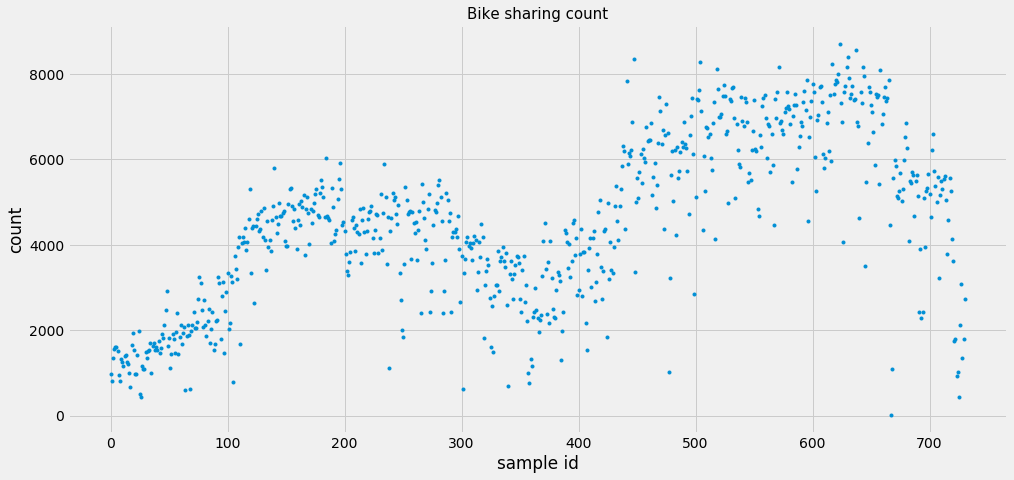

In [10]:
plt.plot(data.cnt, '.')
plt.title('Bike sharing count', fontsize=15)
plt.xlabel('sample id')
plt.ylabel('count')
plt.show()

In [11]:
## no need for instant variable, so we will drop it
data.drop(columns=['instant'], inplace=True, axis=1)

In [12]:
data.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
data.shape

(731, 15)

## 3. Factor analysis

In [14]:
# all the category variables are mapped to int64 
# lets change their data type to 'category'

def int_to_category(data):

    cat_features = data.columns[1:9]
    for features in cat_features:
        data[features] = data[features].astype('category')
        
    return data

In [15]:
data = int_to_category(data)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
date          731 non-null datetime64[ns]
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null category
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(8), datetime64[ns](1), float64(3), int64(3)
memory usage: 71.7 KB


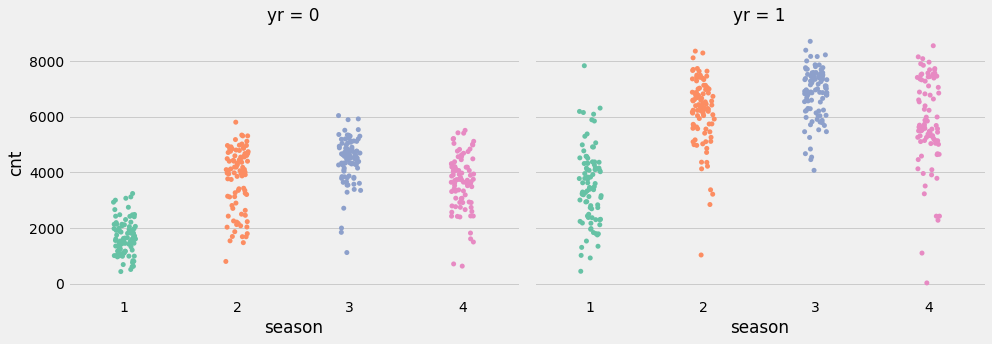

In [17]:
sns.catplot(data = data, x = 'season', y = "cnt", col = 'yr', palette = 'Set2', aspect=1.4)
plt.show()

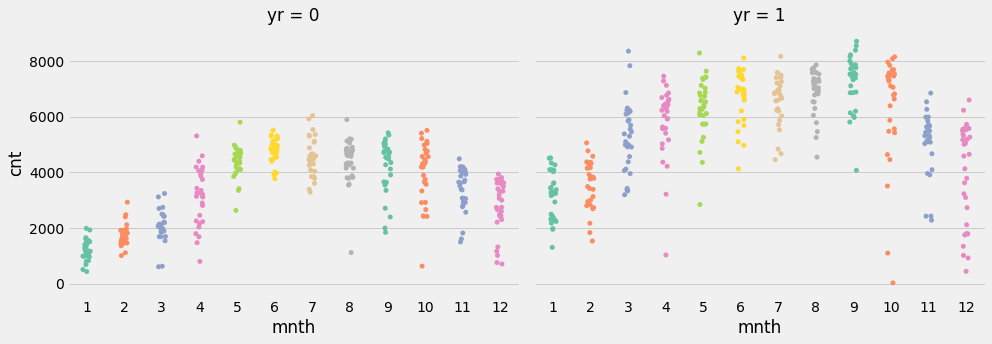

In [18]:
sns.catplot(data = data, x = 'mnth', y = "cnt", col='yr', palette = 'Set2', aspect=1.4)
plt.show()

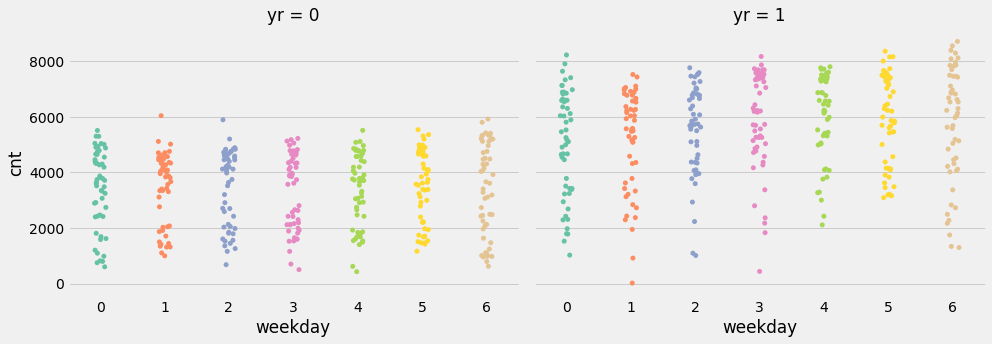

In [19]:
sns.catplot(data = data, x = 'weekday', y = "cnt", palette = 'Set2', aspect=1.4, col='yr')
plt.show()

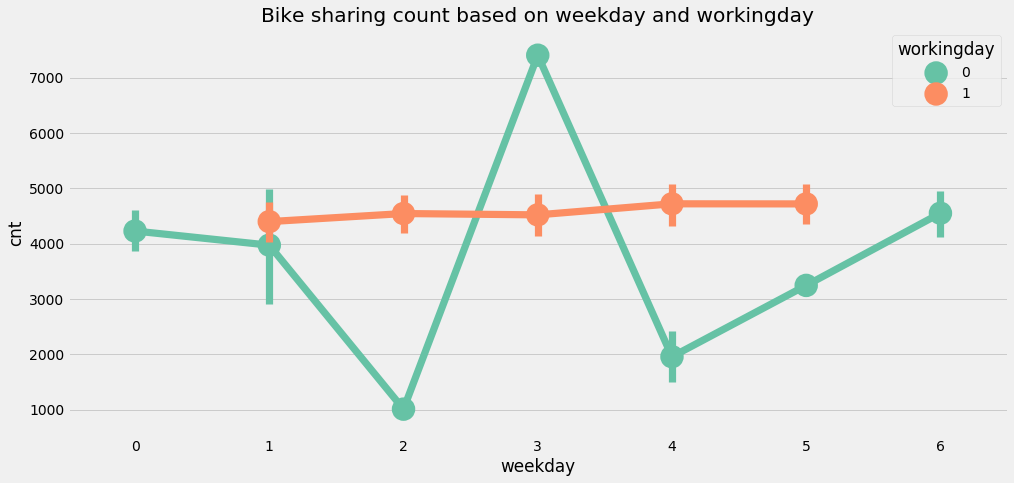

In [20]:
sns.pointplot(data = data, x = 'weekday', y = "cnt", hue='workingday', palette = 'Set2', aspect=1.4)
plt.title('Bike sharing count based on weekday and workingday')
plt.show()

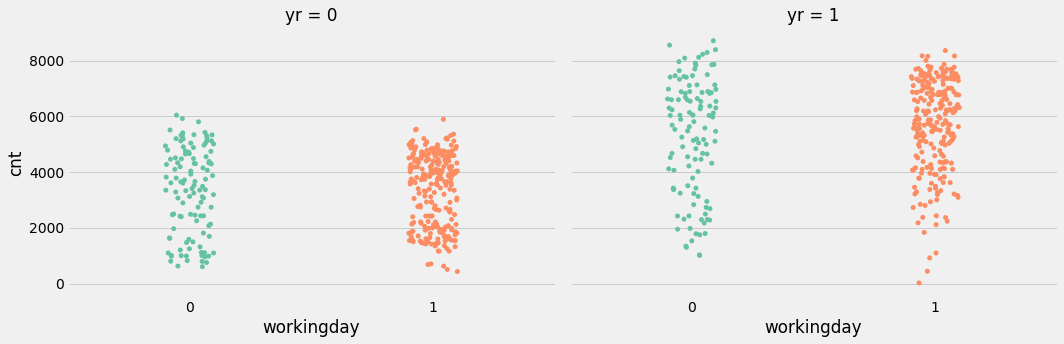

In [21]:
sns.catplot(data = data, x = 'workingday', y = "cnt", palette = 'Set2', aspect=1.5, col='yr')
plt.show()

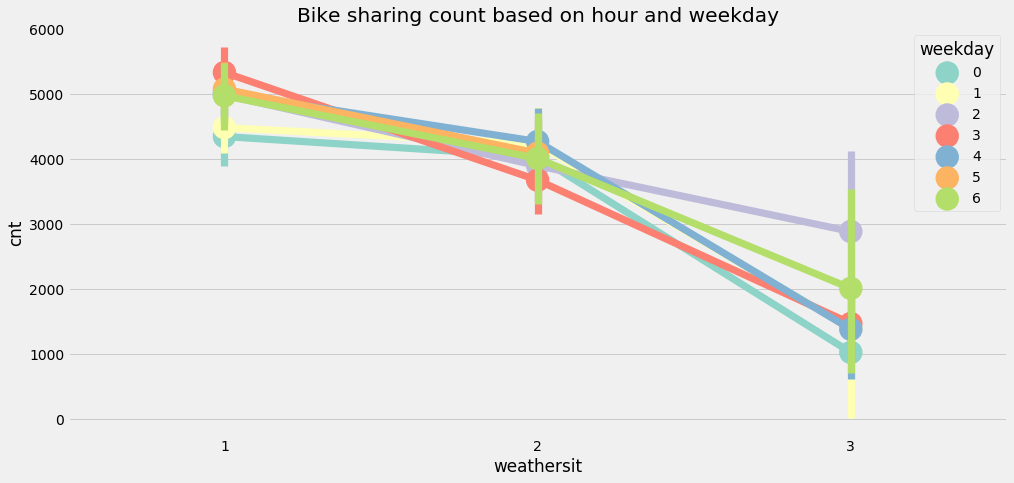

In [23]:
sns.pointplot(data = data, x = 'weathersit', y = "cnt", hue='weekday', palette = 'Set3', aspect=1.5)
plt.title('Bike sharing count based on hour and weekday')
plt.show()

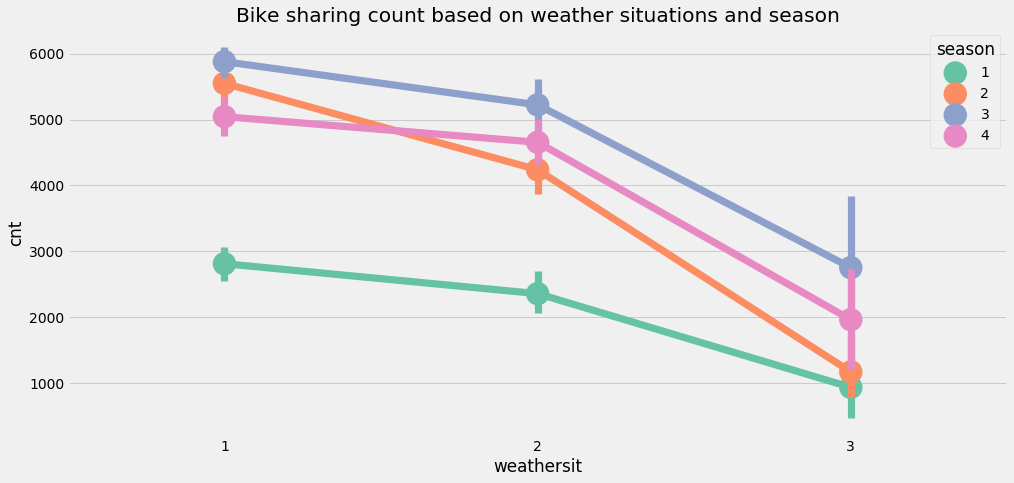

In [24]:
sns.pointplot(data = data, x = 'weathersit', y = "cnt", hue='season', palette = 'Set2', aspect=1.5)
plt.title('Bike sharing count based on weather situations and season')
plt.show()

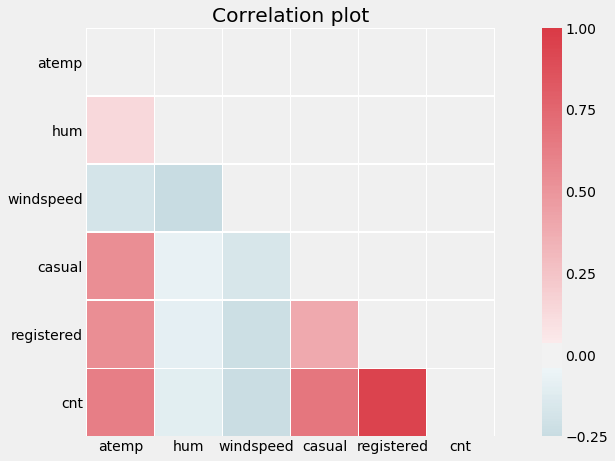

In [25]:
corr = data.corr()

plt.rcParams['figure.figsize'] = 15, 7

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0, square=True, linewidths=.5, cmap=cmap)
plt.title('Correlation plot')
plt.show()

## 4. Feature engineering

### 4.1 Remove casual and registered features

- cnt = casual + registered
- Hence, considering casual and registered will lead to target leak so remove these features for modeling

In [26]:
data.drop(columns=['casual', 'registered'], axis=1, inplace=True)

In [27]:
data.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## 4.2 Feature engineering for Hurricane Sandy

- Hurricane Sandy started on 12th Oct 2012.
- It would have greatly impacted the bike sharing counts
- So, lets add a flag for Harricane Sandy
- Before 12.10.2012 the flag will be 0 and after 12.10.2012 it will be 1.

In [28]:
def hurricane_sandy_flag(data):

    # start date : 12.10.2012
    data['HurricaneSandy'] = np.where((data['date']>=pd.Timestamp(2012, 10, 12).date()), 1, 0)

    return data

In [29]:
data = hurricane_sandy_flag(data)

In [30]:
data.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,HurricaneSandy
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0


In [31]:
data.to_csv(os.path.join(DATADIR, 'bike-sharing-processed.csv'), index=False)